In [1]:
!pip install pandas matplotlib -q

/tmp/ipykernel_31014/1981566182.py:6: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


                                                 N+C  \
0  AHB-W21-005-BEIGEMB-W21-131-BEIGEMB-W21-131-BE...   
1  BUTW22S010-R/SBUTW22S014-R/SBUTW22S010-R/SBUTW...   
2  MB-EA23-10-R/SMB-EA23-97-R/SMB-F23-416-R/SMB-F...   
3  MB-EA23-114-R/SMB-EA23-114-R/SMB-F23-416-R/SMB...   
4  MB-EA23-90-POWDER BLUEMB-EA23-90-POWDER BLUEMB...   

                                                Shop  Sample Count  
0  Centaurus MallEmporium Mall LahoreMini Market ...             1  
1  Amazon Mall IslamabadAmazon Mall IslamabadAmaz...             1  
2  Amazon Mall IslamabadAmazon Mall IslamabadAmaz...             1  
3  Amazon Mall IslamabadAmazon Mall IslamabadAmaz...             1  
4  OnlineOnlineOnlineOnlineOnlineOnlineOnlineOnli...             1  
Summary Statistics:
                      Date  Retail Price  Current Discount Price      SAL QTY  \
count                  183  1.830000e+02            1.830000e+02   183.000000   
mean   2022-08-07 00:00:00  8.046181e+06            3.754972e+06  2

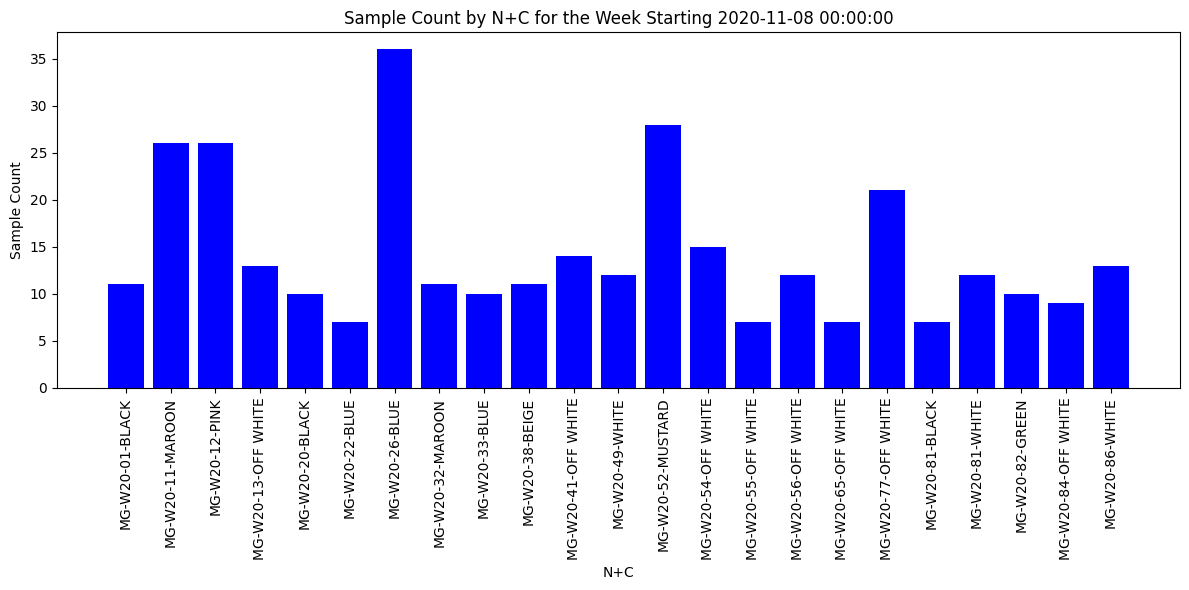

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'SampleFile2.csv'
data = pd.read_csv(file_path)

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate data by week
data.set_index('Date', inplace=True)
weekly_data = data.resample('W').sum().reset_index()

# Group by N+C and Shop, count number of samples per group
sample_counts = weekly_data.groupby(['N+C', 'Shop']).size().reset_index(name='Sample Count')

# Show sample counts
print(sample_counts.head())

# Additional EDA
print("Summary Statistics:")
print(weekly_data.describe())

print("Data Types:")
print(weekly_data.dtypes)

print("Missing Values:")
print(weekly_data.isnull().sum())

# Select a specific week for plotting
# For example, let's take the first week in the dataset
selected_week = weekly_data['Date'].min()

# Filter data for the selected week
selected_week_data = data[data.index.to_period('W') == selected_week.to_period('W')]

# Group by N+C and count samples for the selected week
plot_data = selected_week_data.groupby('N+C').size().reset_index(name='Sample Count')

# Plot N+C vs Sample Count
plt.figure(figsize=(12, 6))
plt.bar(plot_data['N+C'], plot_data['Sample Count'], color='blue')
plt.xlabel('N+C')
plt.ylabel('Sample Count')
plt.title(f'Sample Count by N+C for the Week Starting {selected_week}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [3]:
pip install pmdarima -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
#forecastig using auto-arima
from pmdarima import auto_arima


In [5]:
# Load the data
file_path = 'SampleFile2.csv'
data = pd.read_csv(file_path)

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

/tmp/ipykernel_31014/217430138.py:3: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [6]:
# Aggregate data by week
data.set_index('Date', inplace=True)
weekly_data = data.resample('W').sum().reset_index()

In [7]:
# Ensure data is sorted by date
weekly_data = weekly_data.sort_values('Date')

# Set Date as index
weekly_data.set_index('Date', inplace=True)

# Select the Sales column for prediction
sales_data = weekly_data['Sales']

In [8]:
# Fit AUTO-ARIMA model
model = auto_arima(sales_data, seasonal=True, m=52, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=9.10 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5941.076, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=5941.169, Time=0.78 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5938.337, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=5939.078, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5937.493, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=5938.276, Time=0.97 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=5940.203, Time=2.78 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5921.765, Time=0.12 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5923.033, Time=2.39 sec
 ARIMA(1,1,1)(0,0,1)[52] intercept   : AIC=5922.636, Time=2.32 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=6.31 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=5939.840, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=5922.889, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[52] inte

In [9]:
# Forecast the next 7 days
forecast = model.predict(n_periods=7)

In [10]:
# Create a DataFrame to hold the forecast
forecast_dates = pd.date_range(start=sales_data.index[-1] + pd.Timedelta(days=1), periods=7, freq='W')
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecasted Sales'])

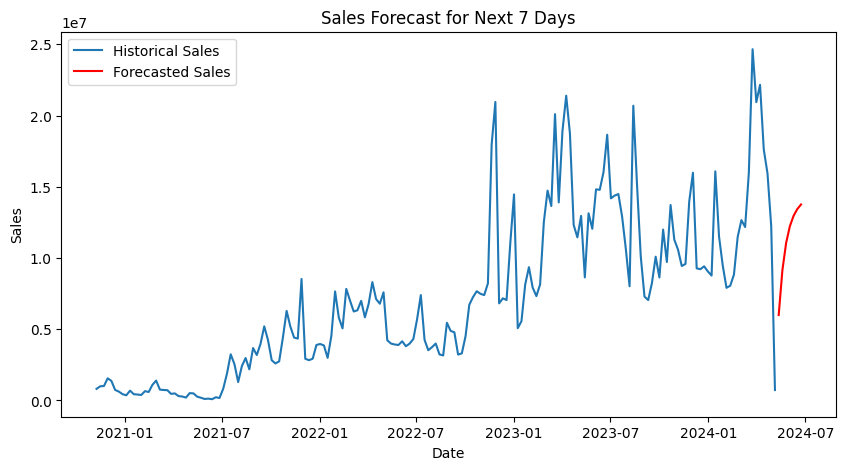

In [11]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(sales_data, label='Historical Sales')
plt.plot(forecast_df, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for Next 7 Days')
plt.legend()
plt.show()

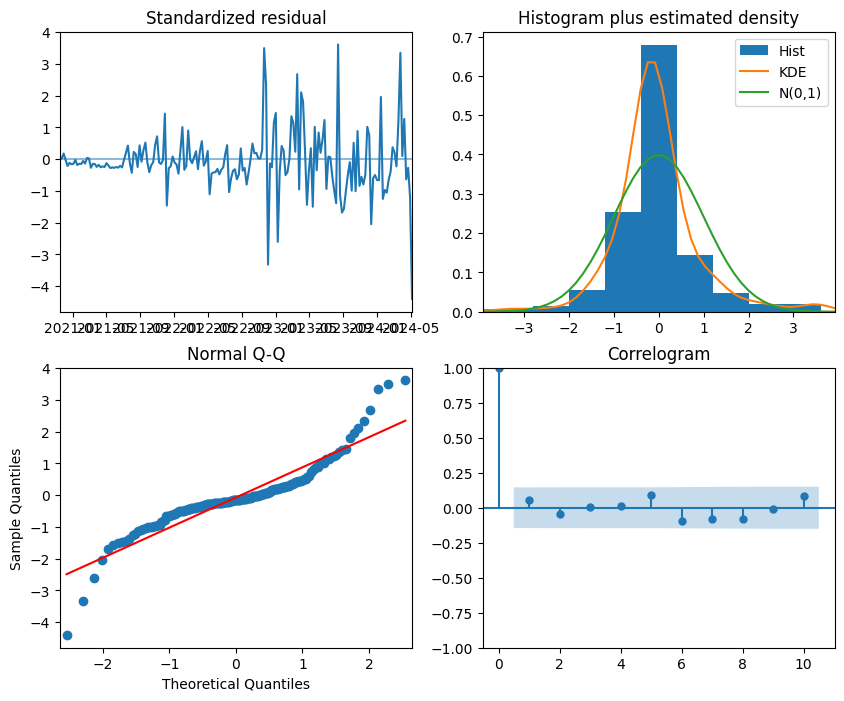

In [12]:
model.plot_diagnostics(figsize=(10, 8))
plt.show()

/tmp/ipykernel_31014/359693276.py:8: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=11.52 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=203.063, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=205.195, Time=1.48 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=205.284, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=201.063, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=203.424, Time=1.22 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=203.548, Time=1.43 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=205.338, Time=3.23 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=204.840, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=204.806, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=202.581, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[52]          
Total fit time: 21.202 seconds


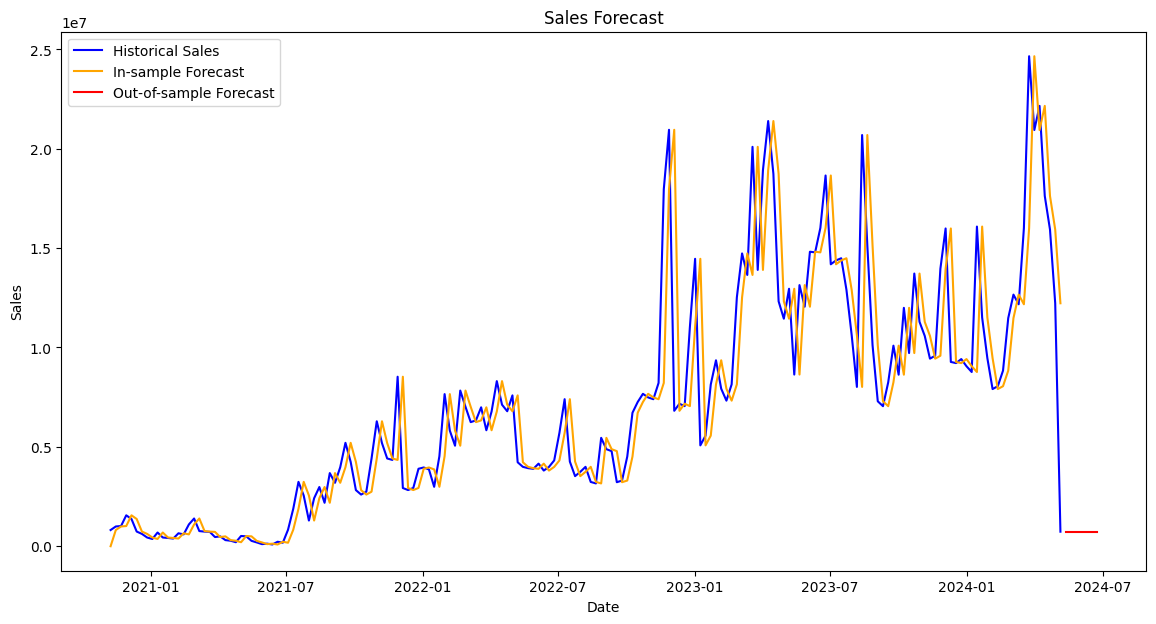

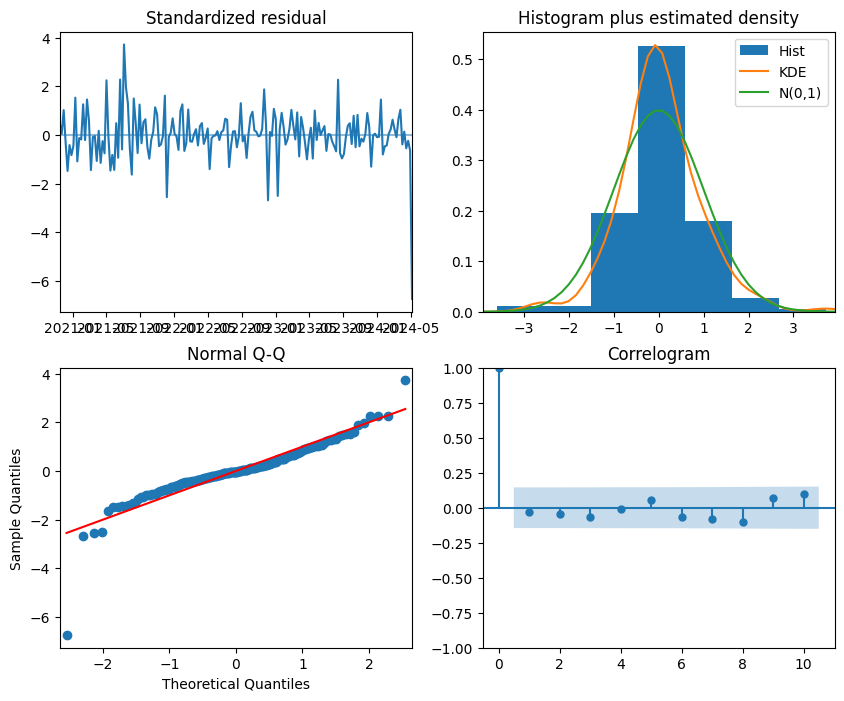

In [13]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = 'SampleFile2.csv'
data = pd.read_csv(file_path)

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Aggregate data by week
data.set_index('Date', inplace=True)
weekly_data = data.resample('W').sum().reset_index()

# Ensure data is sorted by date
weekly_data = weekly_data.sort_values('Date')

# Set Date as index
weekly_data.set_index('Date', inplace=True)

# Select the Sales column for prediction
sales_data = weekly_data['Sales']

# Log transform the data to stabilize variance
sales_data_log = np.log1p(sales_data)

# Fit AUTO-ARIMA model with reduced seasonal parameter
model = auto_arima(sales_data_log, seasonal=True, m=52, trace=True, error_action='ignore', suppress_warnings=True)

# In-sample predictions
in_sample_pred_log = model.predict_in_sample()
in_sample_pred = np.expm1(in_sample_pred_log)  # Reverse the log transformation

# Forecast the next 7 days
forecast_log = model.predict(n_periods=7)
forecast = np.expm1(forecast_log)  # Reverse the log transformation

# Create a DataFrame to hold the forecast
forecast_dates = pd.date_range(start=sales_data.index[-1] + pd.Timedelta(days=1), periods=7, freq='W')
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecasted Sales'])

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(sales_data, label='Historical Sales', color='blue')
plt.plot(sales_data.index, in_sample_pred, label='In-sample Forecast', color='orange')
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Out-of-sample Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()

# Save forecast to a CSV file
forecast_df.to_csv('sales_forecast.csv')

# Diagnostics
model.plot_diagnostics(figsize=(10, 8))
plt.show()
